In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy 

In [2]:
# Load the dataset
file_path = 'daiabet.csv'
diabetes_data = pd.read_csv(file_path)

# Display initial analysis: data types, columns, and general information
diabetes_data_info = {
    "Data Types": diabetes_data.dtypes,
    "Columns": diabetes_data.columns,
    "General Information": diabetes_data.info()
}
diabetes_data_info["Data Types"], diabetes_data_info["Columns"], diabetes_data_info["General Information"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        75 non-null     object 
 1   age                        75 non-null     int64  
 2   hight                      75 non-null     int64  
 3   weight                     75 non-null     int64  
 4   blood sugar                75 non-null     int64  
 5   blood pressure             75 non-null     float64
 6   type of diabetes           75 non-null     int64  
 7   Complications of diabetes  75 non-null     object 
 8   Family history             75 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.4+ KB


(Sex                           object
 age                            int64
 hight                          int64
 weight                         int64
 blood sugar                    int64
 blood pressure               float64
 type of diabetes               int64
 Complications of diabetes     object
 Family history                 int64
 dtype: object,
 Index(['Sex', 'age', 'hight', 'weight', 'blood sugar', 'blood pressure',
        'type of diabetes', 'Complications of diabetes', 'Family history'],
       dtype='object'),
 None)

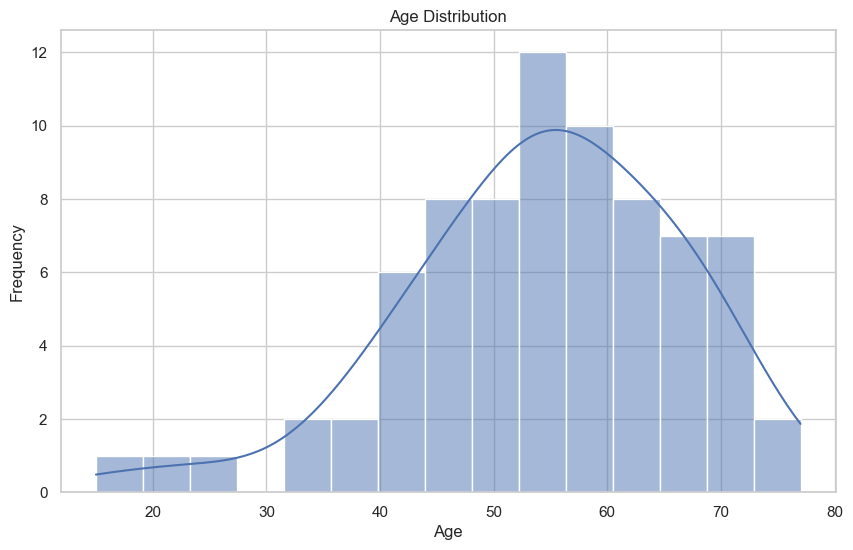

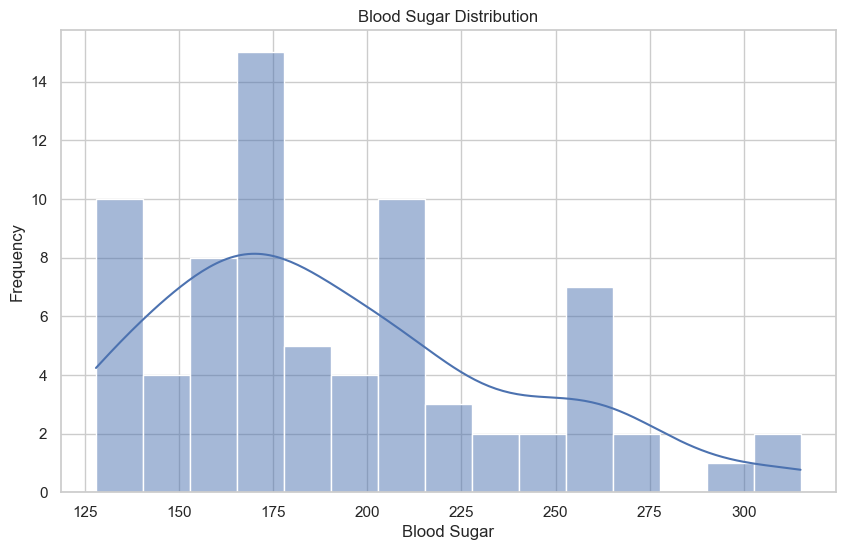

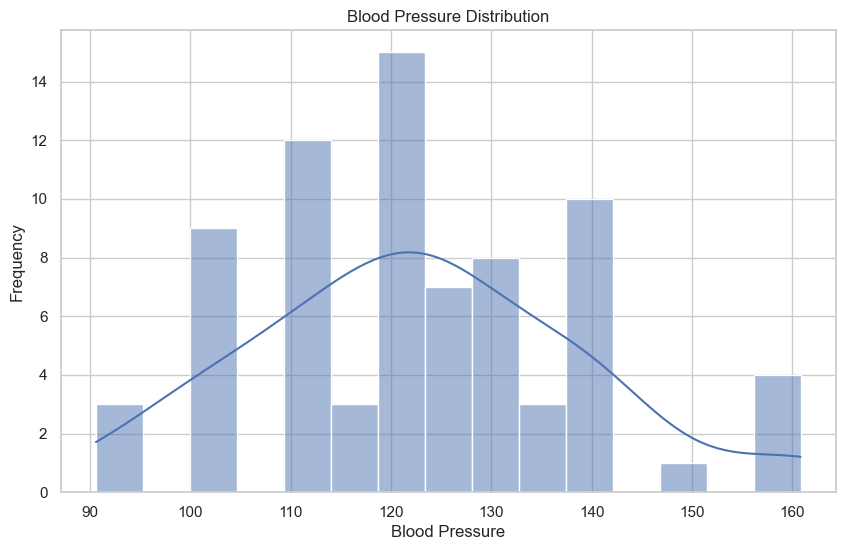

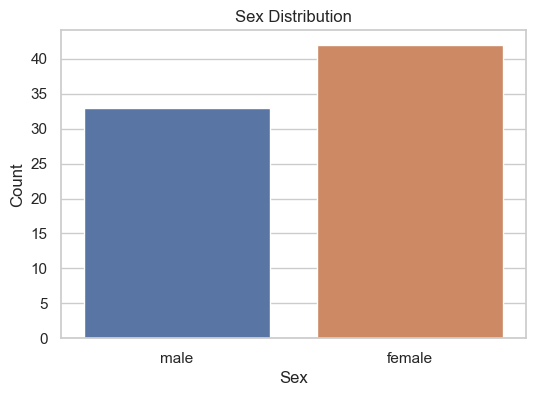

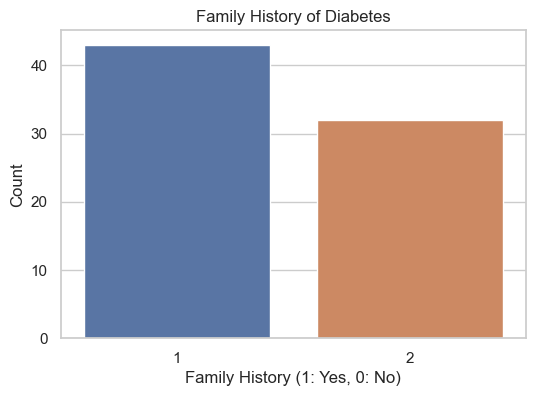

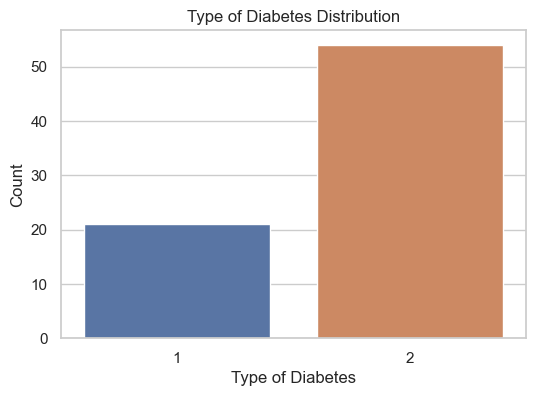

,age,hight,weight,blood sugar,blood pressure,type of diabetes,Family history
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,54.173333,162.906667,74.346667,191.946667,122.662667,1.720000,1.426667
std,12.108042,8.235016,11.542511,47.087869,16.563953,0.452022,0.497924
min,15.000000,147.000000,50.000000,128.000000,90.600000,1.000000,1.000000
25%,47.500000,158.000000,67.000000,163.000000,110.700000,1.000000,1.000000
50%,55.000000,160.000000,75.000000,178.000000,120.800000,2.000000,1.000000
75%,63.000000,168.000000,80.000000,216.500000,130.800000,2.000000,2.000000
max,77.000000,192.000000,110.000000,315.000000,160.800000,2.000000,2.000000


In [8]:
# Setting up the visualisation style
sns.set(style="whitegrid")

# EDA and Visualizations

# Descriptive statistics
desc_stats = diabetes_data.describe()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')  # Save the figure
plt.show()

# Distribution of Blood Sugar
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['blood sugar'], kde=True, bins=15)
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar')
plt.ylabel('Frequency')
plt.savefig('blood_sugar_distribution.png')  # Save the figure
plt.show()

# Distribution of Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['blood pressure'], kde=True, bins=15)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.savefig('blood_pressure_distribution.png')  # Save the figure
plt.show()

# Sex distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=diabetes_data)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('sex_distribution.png')  # Save the figure
plt.show()

# Family History distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Family history', data=diabetes_data)
plt.title('Family History of Diabetes')
plt.xlabel('Family History (1: Yes, 0: No)')
plt.ylabel('Count')
plt.savefig('family_history_distribution.png')  # Save the figure
plt.show()

# Type of Diabetes distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type of diabetes', data=diabetes_data)
plt.title('Type of Diabetes Distribution')
plt.xlabel('Type of Diabetes')
plt.ylabel('Count')
plt.savefig('type_of_diabetes_distribution.png')  # Save the figure
plt.show()

desc_stats

In [4]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataset to apply transformations
transformed_data = diabetes_data.copy()

# Applying Label Encoding to the 'Sex' column
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Sex' column
transformed_data['Sex'] = le.fit_transform(transformed_data['Sex'])

# Checking the transformed data
transformed_data.head()



,Sex,age,hight,weight,blood sugar,blood pressure,type of diabetes,Complications of diabetes,Family history
0,1,64,160,90,196,90.6,2,eye,1
1,1,64,175,65,128,110.6,2,Nervous,1
2,1,55,168,77,211,100.6,1,eye,1
3,0,54,155,84,154,110.5,2,eye,1
4,1,41,173,66,192,90.6,2,Nervous,2


interval columns not set, guessing: ['Sex', 'age', 'hight', 'weight', 'blood sugar', 'blood pressure', 'type of diabetes', 'Family history']


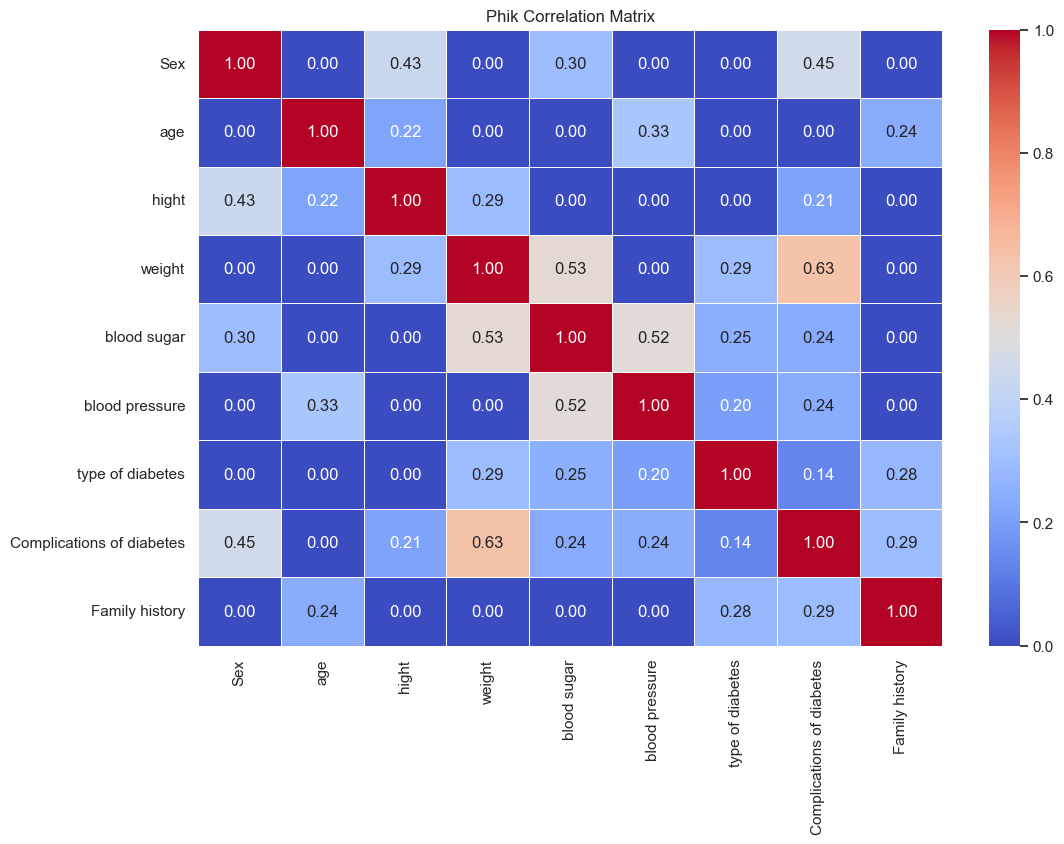

,Sex,age,hight,weight,blood sugar,blood pressure,type of diabetes,Complications of diabetes,Family history
Sex,1.000000,0.000000,0.430171,0.000000,0.295706,0.000000,0.000000,0.453185,0.000000
age,0.000000,1.000000,0.215301,0.000000,0.000000,0.331222,0.000000,0.000000,0.239614
hight,0.430171,0.215301,1.000000,0.290415,0.000000,0.000000,0.000000,0.213137,0.000000
weight,0.000000,0.000000,0.290415,1.000000,0.528162,0.000000,0.294910,0.630222,0.000000
blood sugar,0.295706,0.000000,0.000000,0.528162,1.000000,0.519081,0.246407,0.238109,0.000000
blood pressure,0.000000,0.331222,0.000000,0.000000,0.519081,1.000000,0.201293,0.238451,0.000000
type of diabetes,0.000000,0.000000,0.000000,0.294910,0.246407,0.201293,1.000000,0.136227,0.278455
Complications of diabetes,0.453185,0.000000,0.213137,0.630222,0.238109,0.238451,0.136227,1.000000,0.290820
Family history,0.000000,0.239614,0.000000,0.000000,0.000000,0.000000,0.278455,0.290820,1.000000


In [5]:
# Calculating the correlation matrix using phik
phik_correlation = transformed_data.phik_matrix()
# Visualizing the phik correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(phik_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Phik Correlation Matrix')
plt.show()
phik_correlation


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
# Load your data
file_path = 'daiabet.csv' 
data = pd.read_csv(file_path)

# Encoding categorical variables
le = LabelEncoder()
if data['Sex'].dtype == 'object':
    data['Sex'] = le.fit_transform(data['Sex'])
if data['Complications of diabetes'].dtype == 'object':
    data['Complications of diabetes'] = le.fit_transform(data['Complications of diabetes'])

# Adjusting the labels of the target variable to start from 0
data['type of diabetes'] -= 1

# Selecting features and target
X = data.drop(['type of diabetes'], axis=1)
y = data['type of diabetes']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = nb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.5333333333333333
Confusion Matrix:
[[0 6]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      0.89      0.70         9

    accuracy                           0.53        15
   macro avg       0.29      0.44      0.35        15
weighted avg       0.34      0.53      0.42        15



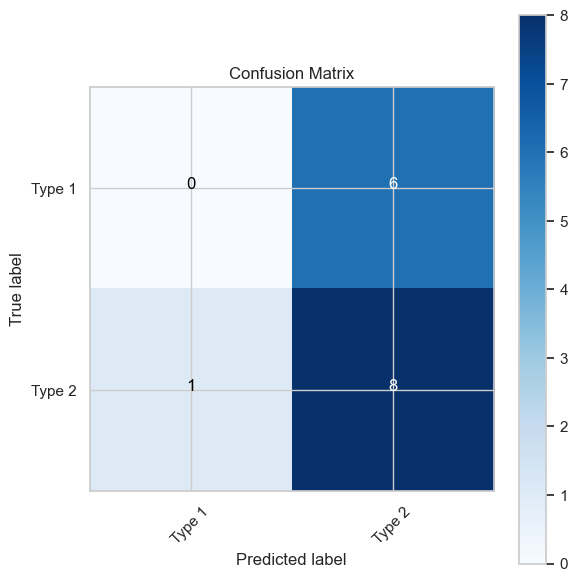

In [9]:
# Correcting the issue in the plot_confusion_matrix function and re-plotting

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Labeling the plot
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')  # Save the figure
    plt.show()

# Recomputing the confusion matrix for the Naive Bayes model
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plot_confusion_matrix(cm, classes=['Type 1', 'Type 2'])



